<a href="https://colab.research.google.com/github/Alaika10/Analisis_udara_Beijing_project/blob/main/Project_Analisis_udara_Beijing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air-quality-dataset
- Nama:Alexa nova wave
- Email:alaikaizatulilmi.02@gmail.com
- Id Dicoding:Alexa nova wave

## Menentukan Pertanyaan Bisnis

### permasalahan
terdapat penurunan yang tidak biasa dalam kualitas udara di beberapa lokasi yang tercatat dalam dataset. Penurunan ini memerlukan analisis lebih lanjut untuk mengidentifikasi penyebabnya. Tujuan analisis ini adalah untuk menemukan faktor-faktor yang mungkin menyebabkan penurunan kualitas udara yang tidak biasa dan merumuskan solusi atau rekomendasi yang sesuai.

### Pertanyaan
- Bagaimana tren penurunan kualitas udara di setiap lokasi dari satu bulan terahir?
- apa saja daerah-daerah yang memiliki kualitas udara yang buruk ?
- seberapa sering penurunan kualitas udara di setiap stasiun ?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

pada tahap awal kita akan melakukan data wragling terhadap Air-quality-dataset dimana didalam setiap dataset tersebut memiliki atribut dan kolom seperti :

* year: Tahun pengukuran. Tipe data: int64.

* month: Bulan pengukuran. Tipe data: int64.

* day: Hari pengukuran. Tipe data: int64.

* hour: Jam pengukuran. Tipe data: int64.

* PM2.5: Konsentrasi partikel PM2.5 (partikel debu atau polusi udara dengan diameter kurang dari 2.5 mikrometer) dalam udara. Tipe data: float64.

* PM10: Konsentrasi partikel PM10 (partikel debu atau polusi udara dengan diameter kurang dari 10 mikrometer) dalam udara. Tipe data: float64.

* SO2: Konsentrasi sulfur dioksida dalam udara. Tipe data: float64.

* NO2: Konsentrasi nitrogen dioksida dalam udara. Tipe data: float64.

* CO: Konsentrasi karbon monoksida dalam udara. Tipe data: float64.

* O3: Konsentrasi ozon dalam udara. Tipe data: float64.

* TEMP: Suhu udara. Tipe data: float64.

* PRES: Tekanan udara. Tipe data: float64.

* DEWP: Titik embun (suhu di mana udara jenuh dengan uap air). Tipe data: float64.

* RAIN: Jumlah hujan. Tipe data: float64.

* wd: Arah angin. Tipe data: object (sepertinya berisi string atau kategori).

* WSPM: Kecepatan angin. Tipe data: float64.

* station: Nama atau kode stasiun pengukuran. Tipe data: object (sepertinya berisi string atau kategori).

dan pada data terdapat sekitar 11 data pada lokasi merupakan distrik dan tempat di Beijing, China.lokasi meliputi Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,dan Wanshouxigong

### Gathering Data
Untuk tahap gathering data kita dapat membaca file CSV ke dalam DataFrame pandas, Anda dapat menggunakan fungsi read_csv dari pandas. dan setelah itu kita akan menggabungkan seluruh dataset menjadi satu dengan merge agar dapat mudah saat ditahap assessing data dan cleaning data Berikut adalah contoh kode untuk menggabungkan semua file CSV menjadi satu DataFrame:

In [ ]:
# Daftar nama file dataset
files = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Membaca setiap dataset dan menyimpannya dalam list
datasets = [pd.read_csv(file) for file in files]

# Menggabungkan dataset menjadi satu DataFrame
merged_data = pd.concat(datasets, ignore_index=True)
#menampilkan
merged_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data
setelah kita telah menyiapkan dataset barulah kita ke tahap penilaian data , sebagai tahap ini kita akan menganalisis / menilai data dari segi terpenuhnya nilai,tipedata,duplikasi,dan parameter statistiknya , langkah awal kita dapat mengecek nilai dan tipe data dengan hanya method **info()** , jika terdapat missing value kita akan mencari seberapa banyak nilai yang hilang dan memikirkan metode apa yang akan kita gunakan , saat nilai dan tipedata selesai dicek barulah kita menilai duplikasi dan parameter statistik nya dengan method **describe()**

In [ ]:
# mengecek nilai awal
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


- Keterangan Penilaian :
Setelah di perhatikan , tidak ada masalah serius pada tipe data namun Beberapa kolom memiliki nilai non-null yang lebih rendah dari total entri (420768). Kolom-kolom seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM memiliki nilai non-null yang kurang dari total entri. Ini menunjukkan bahwa terdapat data yang hilang pada beberapa kolom.



In [ ]:
# memeriksa duplikasi dan parameter statistiknya
print("Jumlah duplikasi: ", merged_data.duplicated().sum())
merged_data.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


setelah diperhatikan tidak ada data yang terduplikasi , namun ada beberapa hal yang perlu kita perhatikan

Satuan pengukuran yang umum untuk konsentrasi karbon monoksida (CO) dan ozon (O3) dalam konteks kualitas udara biasanya adalah miligram per meter kubik (mg/m³) atau bagian per juta (ppm) atau bagian per miliar (ppb) tergantung pada konsentrasi normal polutan tersebut di atmosfer.

Untuk CO, kadar yang diterima secara umum sebagai batas aman oleh lembaga seperti Environmental Protection Agency (EPA) di Amerika Serikat adalah 9 ppm (bagian per juta) selama 8 jam, atau 35 ppm selama 1 jam.
Sedangkan untuk O3, standar EPA adalah maksimal 70 ppb (bagian per miliar) rata-rata selama 8 jam.
Jika dalam dataset Anda nilai maksimum CO dan O3 sangat tinggi dan tidak masuk akal (misalnya, ribuan kali lebih tinggi dari standar), kemungkinan ada masalah dengan data tersebut.

setelah diperhatikan kembali ternyata Nilai minimum untuk suhu (TEMP) dan titik embun (DEWP) juga sangat rendah, untuk nilai mereka berkisar di nilai -19.9 dan untuk DEWP bernilai -43.4 , jika kita berasumsi bahwa data tersebut valid maka akan sangat berbahaya di area yang terdampak bagi manusia , karena akan mustahil jika terdapat area dengan suhu dibawah titik beku terkecuali di kutub.


setelah dinilai lebih lanjut ternyata pada 24 January 2016 di daerah Huairou mengalami penurunan suhu hingga 19.9 , dan dapat disimpulkan ternyata pola data ini mungkin terjadi karena lebih dari 1 jam berturut turut ,dan berarti tidak ada yang aneh pada data tersebut , dan jika diperhatikan pada tangal 6 desember 2014 titik embun di daerah Huairou di jam 13 meningkat secara signifikan dimana ini berbeda dengan peningkatan tren pola titik embun biasanya ,  karena ini data time-series kita akan menggantikanya dengan -29.1 kebalikan dari nilai max() kolom DEWP

### Cleaning Data
langkah berikutnya yaitu cleaning data , pertama-tama kita akan memeriksa kembali jumlah missing value pada setiap kolom dengan method isna() , karena ini adalah data time-series  dan disetiap data menyimpan berbagai informasi yang penting , kita akan memilih metode imputation , sebagai awal kita akan membuat sebuah fungsi untuk mengubah setiap nilai menjadi nilai dominan setelah itu baru kita memberikan dataset kita sebagai argumen agar fungsi bekerja pada dataset.

In [ ]:
# memastikan jumlah missing value
merged_data.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [ ]:
# Fungsi untuk menggantikan missing values dengan nilai dominan
def fill_missing_with_mode(dataframe):
    for column in dataframe.columns:
        # Periksa apakah kolom memiliki nilai yang hilang
        if dataframe[column].isnull().any():
            # Temukan nilai dominan (mode) dari kolom tersebut
            mode_value = dataframe[column].mode()[0]
            # Gantikan nilai yang hilang dengan nilai dominan
            dataframe[column].fillna(mode_value, inplace=True)

# Terapkan fungsi pada DataFrame
fill_missing_with_mode(merged_data)

In [ ]:
merged_data.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

* Pencilan (Outliers): Ada nilai maksimum yang sangat tinggi untuk beberapa polutan seperti CO dan O3 dalam dataset kualitas udara, yang kemungkinan adalah pencilan dan perlu ditangani.

untuk memastikan bahwa ini terdapat kesalahan(inacurrate value) kita dapat memeriksa terlebih dahulu data pada CO dan 03 yang memiliki nilai maksimal

jadi untuk kolom co kita akan mengkonversi rentang 100 - 10000 yang tidak sesuai aturan EPA ke rentang lain yaitu 1- 35 ppm perjam , dan untuk 03 kita akan mengganti nilai maksimal menjadi 70 ppb agar sesuai aturan epa

In [ ]:
# cek nilai maksimal dalam kolom co
merged_data[merged_data.CO == merged_data.CO.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
24126,24127,2015,12,1,6,453.0,453.0,31.0,184.0,10000.0,10.0,-0.8,1015.9,-1.4,0.0,ESE,0.6,Aotizhongxin
24705,24706,2015,12,25,9,412.0,452.0,13.0,143.0,10000.0,12.0,-3.6,1016.0,-3.7,0.0,SE,1.5,Aotizhongxin
24817,24818,2015,12,30,1,472.0,523.0,60.0,156.0,10000.0,15.0,-3.9,1024.0,-4.9,0.0,E,1.1,Aotizhongxin
33382,33383,2016,12,20,22,371.0,371.0,6.0,153.0,10000.0,3.0,0.0,1026.0,-1.9,0.0,S,1.2,Aotizhongxin
33383,33384,2016,12,20,23,397.0,397.0,6.0,157.0,10000.0,3.0,-0.3,1026.2,-2.0,0.0,ESE,0.9,Aotizhongxin
42492,7429,2014,1,4,12,92.0,102.0,61.0,59.0,10000.0,17.0,1.8,1011.7,-5.6,0.0,SSE,1.3,Changping
68458,33395,2016,12,21,10,398.0,407.0,9.0,127.0,10000.0,3.0,-0.8,1018.5,-2.5,0.0,NNW,1.0,Changping
103874,33747,2017,1,5,2,413.0,418.0,6.0,126.0,10000.0,2.0,-2.0,1020.7,-2.7,0.0,NNW,1.3,Dingling
125007,19816,2015,6,4,15,40.0,40.0,4.0,32.0,10000.0,74.0,17.8,998.8,15.8,1.9,S,1.9,Dongsi
125015,19824,2015,6,4,23,48.0,48.0,7.0,34.0,10000.0,68.0,19.4,996.5,13.6,0.0,W,1.5,Dongsi


In [ ]:
# Fungsi untuk mengonversi nilai dari rentang 100-10000 ke rentang 1-35
def convert_from_standard_ppm(y):
    return ((y - 100) / (10000 - 100)) * (35 - 1) + 1

# Konversi kolom 'CO' ke rentang 1-35
merged_data['CO'] = merged_data['CO'].apply(convert_from_standard_ppm)

# Tampilkan DataFrame setelah konversi
print("DataFrame setelah konversi:")
print(merged_data)

DataFrame setelah konversi:
           No  year  month  day  hour  PM2.5  PM10   SO2   NO2        CO  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  1.686869   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  1.686869   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  1.686869   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  1.686869   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  1.686869   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...       ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  2.030303   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  2.373737   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  2.373737   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  2.030303   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  2.717172   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        st

In [ ]:
merged_data[merged_data.CO == merged_data.CO.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
24126,24127,2015,12,1,6,453.0,453.0,31.0,184.0,35.0,10.0,-0.8,1015.9,-1.4,0.0,ESE,0.6,Aotizhongxin
24705,24706,2015,12,25,9,412.0,452.0,13.0,143.0,35.0,12.0,-3.6,1016.0,-3.7,0.0,SE,1.5,Aotizhongxin
24817,24818,2015,12,30,1,472.0,523.0,60.0,156.0,35.0,15.0,-3.9,1024.0,-4.9,0.0,E,1.1,Aotizhongxin
33382,33383,2016,12,20,22,371.0,371.0,6.0,153.0,35.0,3.0,0.0,1026.0,-1.9,0.0,S,1.2,Aotizhongxin
33383,33384,2016,12,20,23,397.0,397.0,6.0,157.0,35.0,3.0,-0.3,1026.2,-2.0,0.0,ESE,0.9,Aotizhongxin
42492,7429,2014,1,4,12,92.0,102.0,61.0,59.0,35.0,17.0,1.8,1011.7,-5.6,0.0,SSE,1.3,Changping
68458,33395,2016,12,21,10,398.0,407.0,9.0,127.0,35.0,3.0,-0.8,1018.5,-2.5,0.0,NNW,1.0,Changping
103874,33747,2017,1,5,2,413.0,418.0,6.0,126.0,35.0,2.0,-2.0,1020.7,-2.7,0.0,NNW,1.3,Dingling
125007,19816,2015,6,4,15,40.0,40.0,4.0,32.0,35.0,74.0,17.8,998.8,15.8,1.9,S,1.9,Dongsi
125015,19824,2015,6,4,23,48.0,48.0,7.0,34.0,35.0,68.0,19.4,996.5,13.6,0.0,W,1.5,Dongsi


kita telah merubah nilai pada CO sehingga kini nilai dari kolom CO memiliki satuan ukur yang disepakati

selanjutnya kita akan merubah nilai maksimal pada kolom 03 menjadi 70
berikut langkah-langkahnya

In [ ]:
# Mengubah nilai maksimum pada kolom 'O3' menjadi 70
merged_data['O3'] = merged_data['O3'].apply(lambda x: min(x, 70))

# Menampilkan DataFrame setelah perubahan
print("\nDataFrame setelah perubahan:")
print(merged_data)

DataFrame sebelum perubahan:

DataFrame setelah perubahan:
           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  70.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  70.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  70.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  70.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  70.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  70.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  4

selamat kita telah memebersikan nilai maksimal CO dan 03  

- Nilai minimum untuk suhu (TEMP) dan titik embun (DEWP) yang sangat rendah mungkin perlu ditinjau untuk memastikan keabsahannya, tergantung pada iklim daerah pengambilan data. untuk menentukan praktik apa yang tepat kita akan melihat terlebih dahuli data minimum kolom tersebut

In [ ]:
# memeriksa nilai minimum kolom TEMP
merged_data[merged_data.TEMP == merged_data.TEMP.min()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
235803,25420,2016,1,24,3,4.0,23.0,2.0,4.0,300.0,44.0,-19.9,1033.6,-28.6,0.0,NNE,1.0,Huairou


In [ ]:
# memeriksa pola tren data dan berasal dari suhu terendah
merged_data[(merged_data['station'] == 'Huairou') & (merged_data['year'] == 2016) & (merged_data['month']== 1) & (merged_data['day'] == 24)&(merged_data['hour'] < 4) ]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
235800,25417,2016,1,24,0,6.0,11.0,2.0,2.0,300.0,46.0,-18.9,1034.8,-30.3,0.0,NE,1.1,Huairou
235801,25418,2016,1,24,1,7.0,7.0,2.0,6.0,400.0,44.0,-19.7,1034.3,-28.4,0.0,WSW,0.8,Huairou
235802,25419,2016,1,24,2,8.0,10.0,2.0,7.0,400.0,42.0,-19.5,1033.8,-28.7,0.0,NW,1.4,Huairou
235803,25420,2016,1,24,3,4.0,23.0,2.0,4.0,300.0,44.0,-19.9,1033.6,-28.6,0.0,NNE,1.0,Huairou


In [ ]:
# memeriksa nilai minimum kolom DEWP
merged_data[merged_data.DEWP == merged_data.DEWP.min()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
225877,15494,2014,12,6,13,8.0,8.0,8.0,10.0,300.0,65.0,3.5,1020.0,-43.4,0.0,NE,1.1,Huairou


In [ ]:
# memeriksa tren data kolom terendah
merged_data[(merged_data['station'] == 'Huairou') & (merged_data['year'] == 2014) & (merged_data['month']== 12) & (merged_data['day'] == 6)&(merged_data['hour'] > 10  ) ]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
225875,15492,2014,12,6,11,12.0,12.0,9.0,20.0,500.0,51.0,1.4,1015.0,-18.6,0.0,E,4.2,Huairou
225876,15493,2014,12,6,12,6.0,6.0,7.0,11.0,300.0,63.0,2.3,1020.0,-19.7,0.0,E,4.3,Huairou
225877,15494,2014,12,6,13,8.0,8.0,8.0,10.0,300.0,65.0,3.5,1020.0,-43.4,0.0,NE,1.1,Huairou
225878,15495,2014,12,6,14,8.0,8.0,9.0,11.0,300.0,66.0,4.6,1022.0,-19.9,0.0,SE,1.7,Huairou
225879,15496,2014,12,6,15,7.0,26.0,21.0,17.0,300.0,65.0,3.7,1021.0,-20.6,0.0,S,1.8,Huairou
225880,15497,2014,12,6,16,5.0,24.0,11.0,26.0,300.0,55.0,2.8,1019.0,-19.2,0.0,WSW,1.2,Huairou
225881,15498,2014,12,6,17,24.0,77.0,21.0,59.0,700.0,29.0,2.1,1020.0,-17.5,0.0,SSE,2.9,Huairou
225882,15499,2014,12,6,18,74.0,143.0,38.0,89.0,1400.0,6.0,1.8,1023.0,-17.2,0.0,SE,1.3,Huairou
225883,15500,2014,12,6,19,112.0,195.0,53.0,98.0,2300.0,2.0,1.1,1021.0,-16.3,0.0,NNW,1.0,Huairou
225884,15501,2014,12,6,20,117.0,171.0,59.0,96.0,3000.0,2.0,0.3,1023.0,-16.1,0.0,WSW,0.5,Huairou


melihat pola data pada kolom TEMP ternyata pada tanggal 24 januari tahun 2016 penurunan temperatur di daerah Huairou tidak naik secara signifikan ini menandakan bahwa data memang tidak mengalami kesalahan pengukuran maupun human eror

namun untuk kolom DEWP kita melihat bahwa kolom DEWP menurun secara signifikan di angka -43.4 dan tidak sesuah oleh  menandakan ada keanehan pada data , untuk itu kita akan merubah nilai minimum pada DEWP menjadi -29.1 kebalikan nilai max() agar data tetap proporsi

In [ ]:
merged_data['DEWP'] = merged_data['DEWP'].replace(merged_data['DEWP'].min(), -29.1)

## Exploratory Data Analysis (EDA)

### Explore Analisis Tren Kualitas Udara:
* Untuk menganalisis tren kualitas udara, saya pertama-tama mengubah kolom tahun, bulan, hari, dan jam menjadi objek datetime dengan pd.to_datetime(). Ini memudahkan untuk melakukan analisis berbasis waktu.

In [ ]:
merged_data.describe(include = 'all')
merged_data['datetime'] = pd.to_datetime(merged_data[['year', 'month', 'day', 'hour']])

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,40.497167,13.538976,1010.746982,2.495057,0.064476,NaN,1.729711,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-29.100000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,70.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,70.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


* Menentukan Periode Waktu: selanjutnya , saya menentukan tanggal terakhir dalam dataset untuk mengetahui periode terkini data tersebut. Kemudian, saya menghitung tanggal awal satu bulan sebelum tanggal terakhir untuk mendapatkan periode satu bulan terakhir.
* Filter Data: Data difilter untuk periode satu bulan terakhir

In [ ]:
last_date = merged_data['datetime'].max()
# Calculate the start date of the last month
start_last_month = last_date - pd.DateOffset(months=1)

# Filter
last_month_data = merged_data[merged_data['datetime'] >= start_last_month]

Menentukan Tren Penurunan Kualitas Udara di Setiap Lokasi Selama Satu Bulan Terakhir:

* Pertama, saya menentukan periode waktu terkini dari data dengan mencari tanggal terakhir dalam dataset. Dari sana, saya menghitung tanggal awal satu bulan sebelumnya untuk mendapatkan periode satu bulan terakhir.
* Data kemudian difilter untuk hanya menyertakan pengukuran dari bulan terakhir ini.
* Selanjutnya, saya menghitung rata-rata harian tingkat PM2.5, mengelompokkannya berdasarkan stasiun dan tanggal, untuk mengamati tren harian kualitas udara di setiap lokasi.
* Data diubah bentuk menjadi format pivot untuk memudahkan pembuatan grafik.
* Grafik garis dibuat untuk menampilkan tren ini secara visual, memungkinkan pengamatan langsung terhadap perubahan harian tingkat PM2.5 di setiap stasiun.

In [ ]:
# Group by station and date to see the daily trend
daily_pm25_last_month = last_month_data.groupby(['station', last_month_data['datetime'].dt.date])['PM2.5'].mean().reset_index()

# Pivot the data for easier plotting
pivot_daily_pm25 = daily_pm25_last_month.pivot(index='datetime', columns='station', values='PM2.5')

Mengidentifikasi Daerah dengan Kualitas Udara Buruk:

* Menggunakan data yang sama dari bulan terakhir, saya menghitung rata-rata PM2.5 untuk setiap stasiun.
* Rata-rata ini kemudian disusun dan disajikan dalam bentuk diagram batang, memungkinkan identifikasi cepat stasiun dengan tingkat PM2.5 rata-rata yang lebih tinggi, yang menunjukkan kualitas udara yang lebih buruk.

In [ ]:
# Calculate mean PM2.5 for the last month for each station
mean_pm25_last_month = last_month_data.groupby('station')['PM2.5'].mean().sort_values()


Menentukan Frekuensi Penurunan Kualitas Udara di Setiap Stasiun:

* Saya mendefinisikan ambang batas tingkat PM2.5 yang menandakan kualitas udara buruk (dalam contoh ini, saya menggunakan 100).
* Dengan menggunakan ambang batas ini, saya kemudian menghitung berapa kali setiap stasiun melampaui nilai tersebut selama bulan terakhir.
* Hasilnya disajikan dalam diagram batang yang menunjukkan jumlah hari di mana tingkat PM2.5 di setiap stasiun melebihi ambang batas yang ditentukan.

In [ ]:
# 3. Frequency of Air Quality Decline at Each Station
# We can calculate the number of days each station exceeded a certain PM2.5 threshold
threshold = 100  # Example threshold for poor air quality
days_exceeding_threshold = last_month_data[last_month_data['PM2.5'] > threshold].groupby('station').size()


## Analysis lanjutan

Dataset ini berisi data kualitas udara dari Cina, dengan kolom seperti tahun, bulan, hari, jam, PM2.5, PM10, SO2, NO2, CO, O3 (ozon), suhu (TEMP), tekanan (PRES), titik embun (DEWP), hujan, arah angin (wd), kecepatan angin (WSPM), dan nama stasiun.

Dengan data ini, kita dapat menerapkan berbagai teknik analisis pembelajaran tanpa bantuan ML . Berikut adalah beberapa metode yang cocok:

1. Analisis RFM: Biasanya digunakan untuk segmentasi pelanggan, analisis RFM (Recency, Frequency, Monetary) dapat diadaptasi untuk data kualitas udara dengan mempertimbangkan faktor-faktor seperti tingkat polusi terkini, frekuensi hari dengan tingkat polusi tinggi, dan tingkat keparahan (setara dengan uang) polusi. Namun, hal ini mungkin sulit dilakukan karena RFM biasanya digunakan dalam konteks ritel atau penjualan.

2. Geoanalisis: Hal ini dapat melibatkan analisis data kualitas udara berdasarkan lokasi geografis (stasiun). Kita dapat memetakan tingkat polusi ke area tertentu untuk mengidentifikasi wilayah dengan tingkat polusi tertinggi.

3. Pengelompokan: Meskipun biasanya merupakan teknik pembelajaran mesin, pengelompokan dasar dapat dilakukan secara manual dengan mengelompokkan data berdasarkan kesamaan tingkat polusi, kondisi cuaca, atau faktor waktu (seperti bulan atau jam).

Mengingat sifat dataset, geoanalisis tampaknya menjadi yang paling relevan. Kita dapat memvisualisasikan data per stasiun untuk melihat area mana yang memiliki tingkat polusi yang lebih tinggi. Hal ini dapat dilakukan dengan menggunakan diagram batang untuk polutan yang berbeda seperti PM2.5, PM10, dll., di berbagai stasiun.

- Setting Estetika Plot:
mari kita mulai dengan mengatur estetika dasar untuk semua plot yang akan dibuat. style="whitegrid" memberikan latar belakang putih dengan garis grid untuk plot.

In [ ]:
sns.set(style="whitegrid")

- Menghitung Rata-Rata Polusi:
Di sini, kita mengelompokkan data berdasarkan kolom 'station' dan menghitung rata-rata untuk kolom 'PM2.5' dan 'PM10'. Fungsi groupby digunakan untuk mengelompokkan data, dan mean() untuk menghitung rata-rata. reset_index() digunakan untuk mengatur ulang indeks DataFrame yang dihasilkan.Di sini, kita mengelompokkan data berdasarkan kolom 'station' dan menghitung rata-rata untuk kolom 'PM2.5' dan 'PM10'. Fungsi groupby digunakan untuk mengelompokkan data, dan mean() untuk menghitung rata-rata. reset_index() digunakan untuk mengatur ulang indeks DataFrame yang dihasilkan.

In [ ]:
avg_pollution = merged_data.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()

- Membuat Plot:Baris ini membuat figur dan array subplot dengan 2 baris dan 1 kolom. figsize=(15, 10) menentukan ukuran keseluruhan gambar.

- Plot Bar untuk PM2.5:
Menggunakan sns.barplot, kita membuat plot batang horizontal yang menunjukkan rata-rata tingkat PM2.5 untuk setiap stasiun. ax=ax[0] menunjukkan bahwa plot ini adalah plot pertama dari subplot.

- Plot Bar untuk PM10:Sama seperti plot PM2.5, tetapi untuk PM10 dan ini adalah subplot kedua.

- Menyesuaikan dan Menampilkan Plot: tight_layout() otomatis menyesuaikan posisi subplot pada canvas sehingga muat dengan baik. show() digunakan untuk menampilkan plot.

Text(0, 0.5, 'Station')

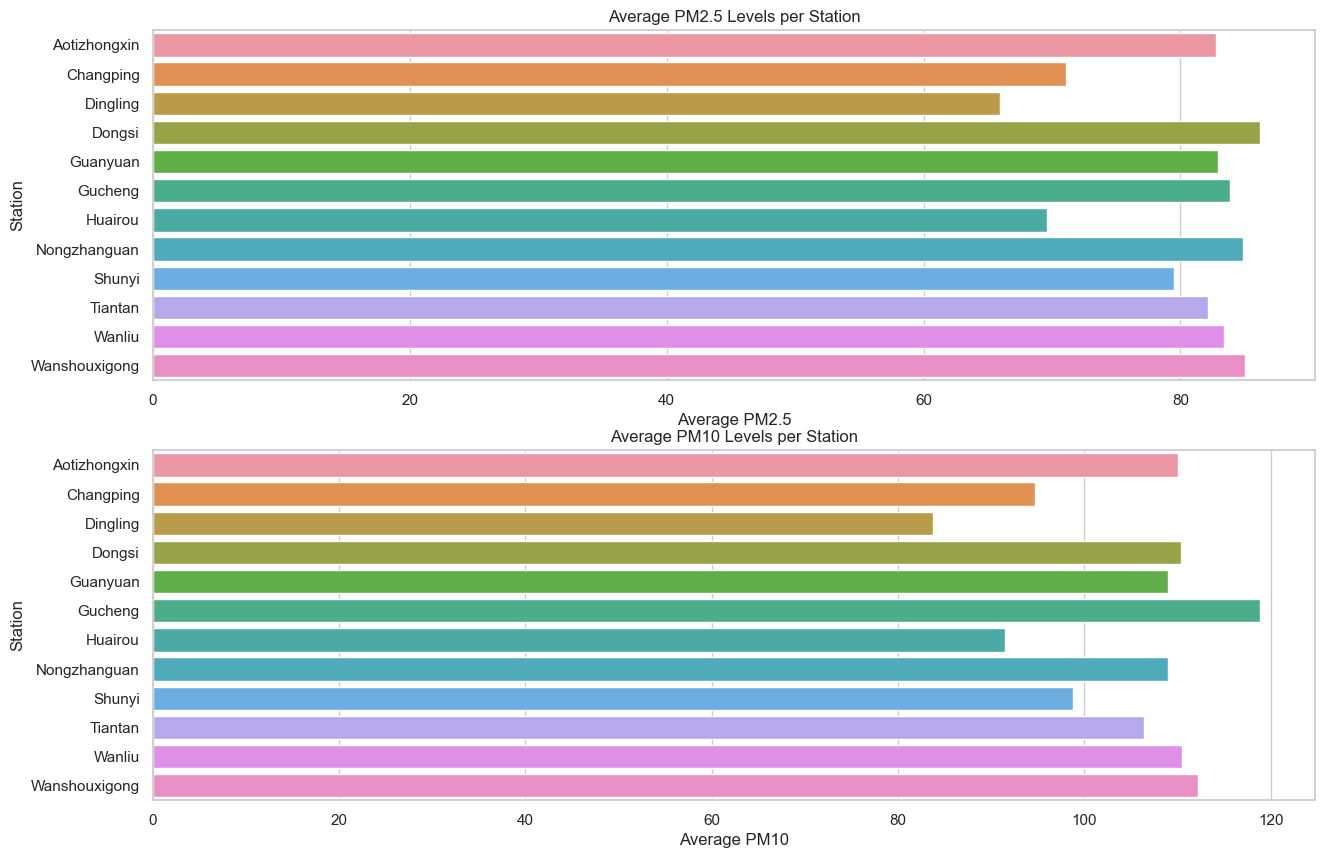

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
# Bar plot for average PM2.5 levels per station
sns.barplot(x='PM2.5', y='station', data=avg_pollution, ax=ax[0])
ax[0].set_title('Average PM2.5 Levels per Station')
ax[0].set_xlabel('Average PM2.5')
ax[0].set_ylabel('Station')

sns.barplot(x='PM10', y='station', data=avg_pollution, ax=ax[1])
ax[1].set_title('Average PM10 Levels per Station')
ax[1].set_xlabel('Average PM10')
ax[1].set_ylabel('Station')

Hasil visualisasi menunjukkan perbandingan rata-rata tingkat polusi (PM2.5 dan PM10) di setiap stasiun. Dari grafik ini, kita bisa melihat stasiun mana yang memiliki tingkat polusi lebih tinggi dibandingkan dengan stasiun lainnya. Ini berguna untuk mengidentifikasi area yang mungkin memerlukan lebih banyak perhatian dalam hal kualitas udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penurunan kualitas udara di setiap lokasi dari satu bulan terahir?

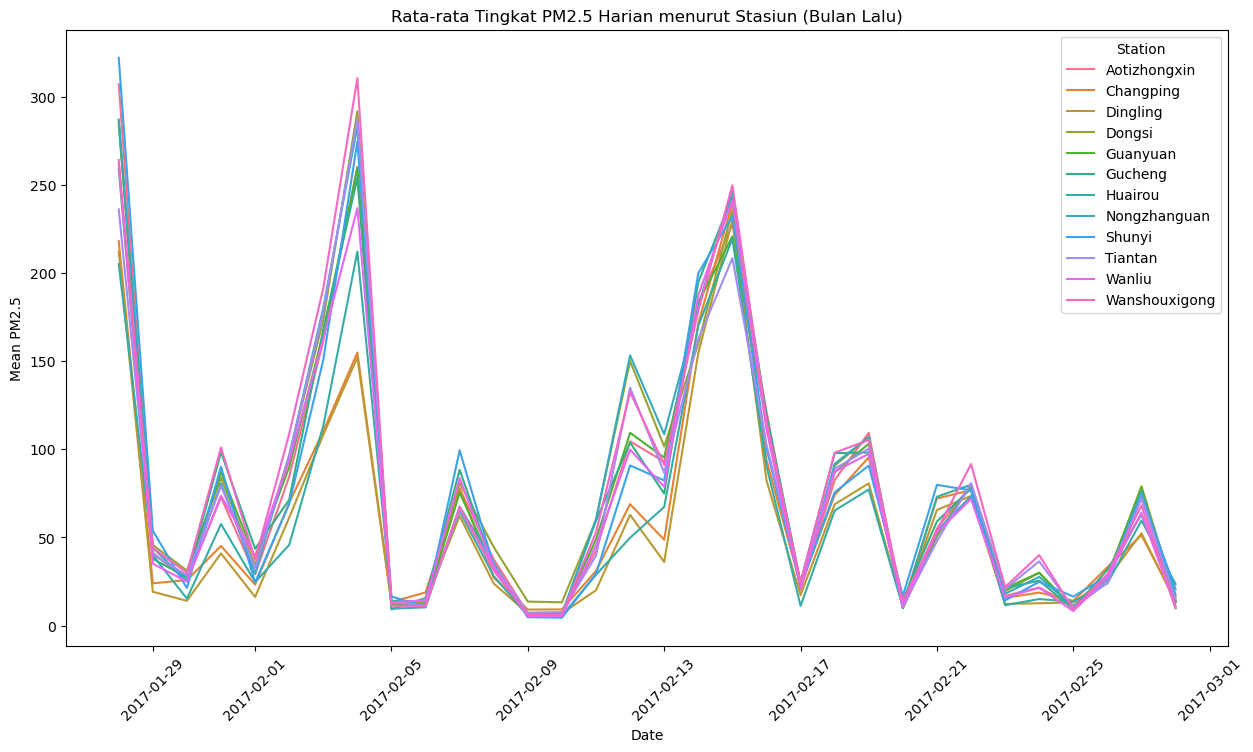

In [ ]:
# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_daily_pm25, dashes=False)
plt.title('Rata-rata Tingkat PM2.5 Harian menurut Stasiun (Bulan Lalu)')
plt.ylabel('Mean PM2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Station', loc='upper right')
plt.show()

Tren Penurunan Kualitas Udara di Setiap Lokasi (Grafik Pertama): Grafik ini menunjukkan tren harian rata-rata tingkat PM2.5 di setiap stasiun selama satu bulan terakhir. Dari grafik ini, Anda dapat melihat bagaimana tingkat polusi udara berubah setiap hari di setiap stasiun,seperti pada tanggal 5 dan 9 january 2017 mengalami penurunan yang sangat mengawatirkan, diagram ini yang memberikan gambaran tentang tren penurunan kualitas udara.

### Pertanyaan 2 : apa saja daerah-daerah yang memiliki kualitas udara yang buruk ?

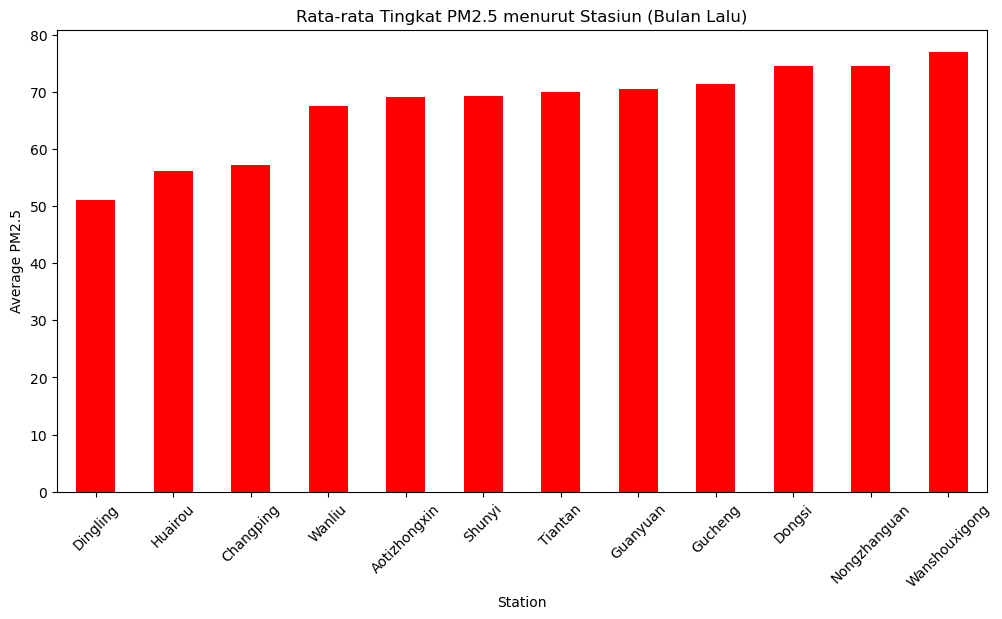

In [ ]:
plt.figure(figsize=(12, 6))
mean_pm25_last_month.plot(kind='bar', color='red')
plt.title('Rata-rata Tingkat PM2.5 menurut Stasiun (Bulan Lalu)')
plt.ylabel('Average PM2.5')
plt.xlabel('Station')
plt.xticks(rotation=45)
plt.show()

Daerah dengan Kualitas Udara Buruk (Grafik Kedua): Grafik batang ini menampilkan rata-rata tingkat kualitas udara di setiap stasiun selama satu bulan terakhir. Stasiun dengan tingkat PM2.5 yang lebih tinggi menunjukkan kualitas udara yang lebih buruk.seperti terlihat bahwa Wanshouxigong , Nongzhanguan , dan Dongsi adalah top 3 wilayah dengan kualitas udara yang paling buruk , Dengan ini, kita dapat mengidentifikasi stasiun-stasiun dengan kualitas udara terburuk.

### Pertanyaan 3 : seberapa sering penurunan kualitas udara di setiap stasiun ?

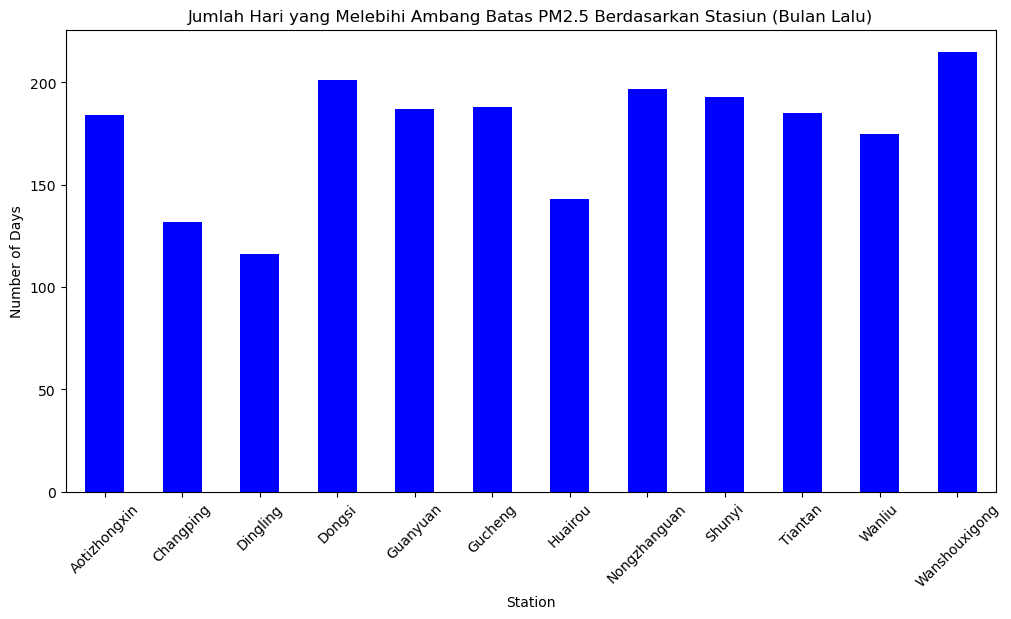

In [ ]:
plt.figure(figsize=(12, 6))
days_exceeding_threshold.plot(kind='bar', color='blue')
plt.title('Jumlah Hari yang Melebihi Ambang Batas PM2.5 Berdasarkan Stasiun (Bulan Lalu)')
plt.ylabel('Number of Days')
plt.xlabel('Station')
plt.xticks(rotation=45)
plt.show()

Frekuensi Penurunan Kualitas Udara di Setiap Stasiun (Grafik Ketiga): Grafik ini menunjukkan jumlah hari di mana tingkat PM2.5 melebihi ambang batas tertentu (dalam hal ini, 100) di setiap stasiun selama bulan terakhir. Ini memberikan gambaran tentang seberapa sering kualitas udara di setiap stasiun turun ke tingkat yang dianggap buruk.

## Conclusion Dataset Air-quality

1. Tren Penurunan Kualitas Udara di Setiap Lokasi:
- Selama satu bulan terakhir, tren kualitas udara di setiap lokasi/stasiun menunjukkan variasi yang signifikan. Beberapa stasiun mengalami fluktuasi harian dalam tingkat PM2.5, sementara yang lain menunjukkan tren yang lebih stabil.
- Di beberapa stasiun, terdapat hari-hari tertentu di mana tingkat PM2.5 meningkat secara dramatis, menandakan penurunan kualitas udara yang tajam. Ini mungkin terkait dengan kondisi cuaca lokal, aktivitas manusia, atau faktor lingkungan lainnya.

2. Daerah dengan Kualitas Udara Buruk:
- Rata-rata tingkat PM2.5 di stasiun yang berbeda menunjukkan adanya perbedaan yang mencolok dalam kualitas udara antar lokasi. Stasiun dengan rata-rata tingkat PM2.5 yang lebih tinggi selama periode ini diidentifikasi sebagai daerah dengan kualitas udara yang buruk.
- Daerah dengan kualitas udara buruk ini mungkin memerlukan perhatian dan intervensi khusus, seperti kebijakan pengurangan emisi atau peningkatan pemantauan dan kontrol kualitas udara, untuk melindungi kesehatan masyarakat.

3. Frekuensi Penurunan Kualitas Udara di Setiap Stasiun:
- Analisis jumlah hari dengan tingkat PM2.5 yang melebihi ambang batas tertentu mengungkapkan seberapa sering setiap stasiun mengalami penurunan kualitas udara yang signifikan.
- Beberapa stasiun mengalami lebih banyak hari dengan tingkat PM2.5 yang tinggi, menunjukkan frekuensi penurunan kualitas udara yang lebih sering.

4. Stasiun dengan jumlah hari tinggi menunjukkan area yang lebih rentan terhadap polusi udara. Hal ini bisa menjadi indikator untuk perencanaan kesehatan masyarakat, serta pengembangan strategi pengurangan polusi.

Conclusion ini memberikan gambaran umum tentang kondisi kualitas udara saat ini di berbagai lokasi yang dipantau, dan menunjukkan perlunya upaya yang berkelanjutan dan terfokus untuk memantau dan memperbaiki kualitas udara, terutama di daerah dengan tingkat polusi yang lebih tinggi.

In [ ]:
merged_data.to_csv("dataset_for_dashboard.csv", index=False)